In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Multiple Linear Regression Dataset.csv")

In [ ]:
df.head()

,Transportation,Stationary,Packaging,Revenue
0,1000,1200,150,1203
1,1200,1150,300,1603
2,1400,1000,450,2003
3,1000,1050,600,2403
4,1800,1000,1000,2803


In [ ]:
df.shape

(24, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Transportation  24 non-null     int64
 1   Stationary      24 non-null     int64
 2   Packaging       24 non-null     int64
 3   Revenue         24 non-null     int64
dtypes: int64(4)
memory usage: 896.0 bytes


In [ ]:
df.describe()

,Transportation,Stationary,Packaging,Revenue
count,24.000000,24.000000,24.000000,24.000000
mean,2625.000000,675.000000,1670.833333,5803.000000
std,1624.071641,361.758988,1046.933064,2828.427125
min,1000.000000,50.000000,150.000000,1203.000000
25%,1000.000000,375.000000,1000.000000,3503.000000
50%,2300.000000,725.000000,1275.000000,5803.000000
75%,4050.000000,1000.000000,2475.000000,8103.000000
max,5600.000000,1200.000000,3600.000000,10403.000000


In [ ]:
sum(df.duplicated())

0

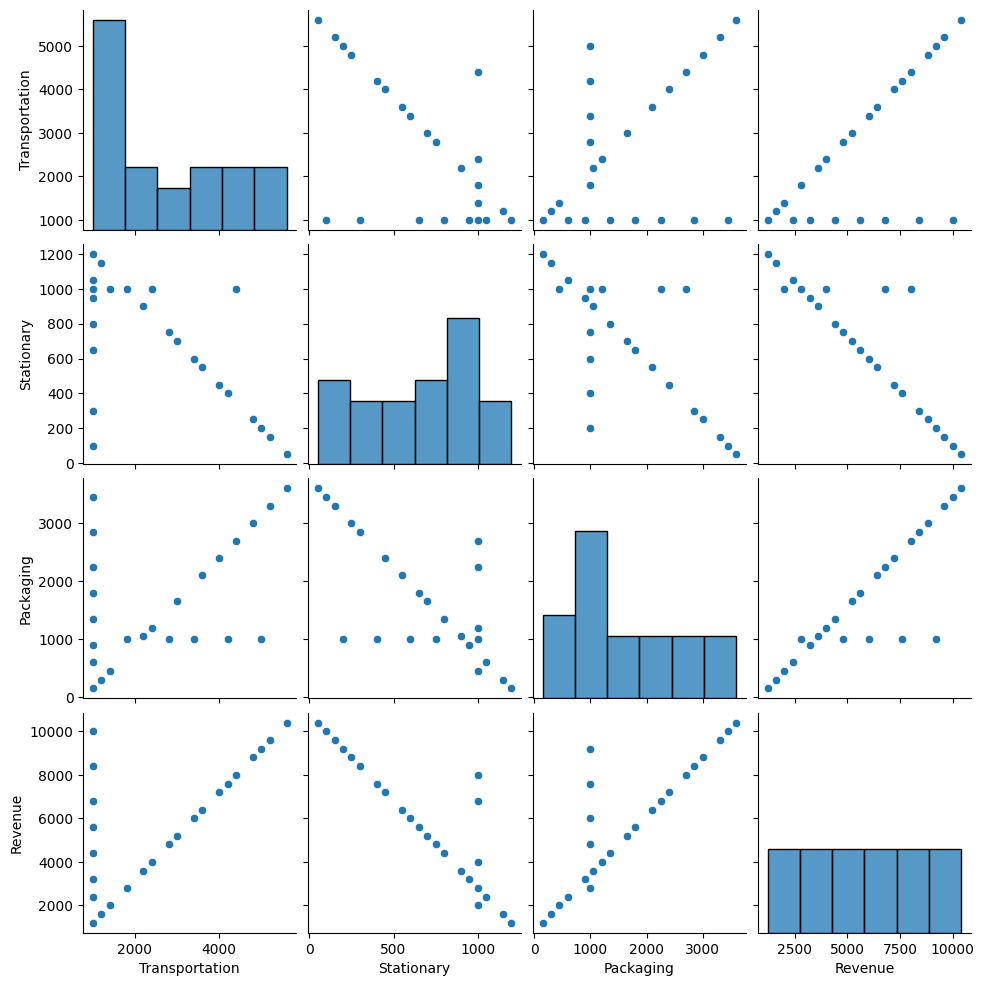

In [ ]:
sns.pairplot(df)

<Axes: >

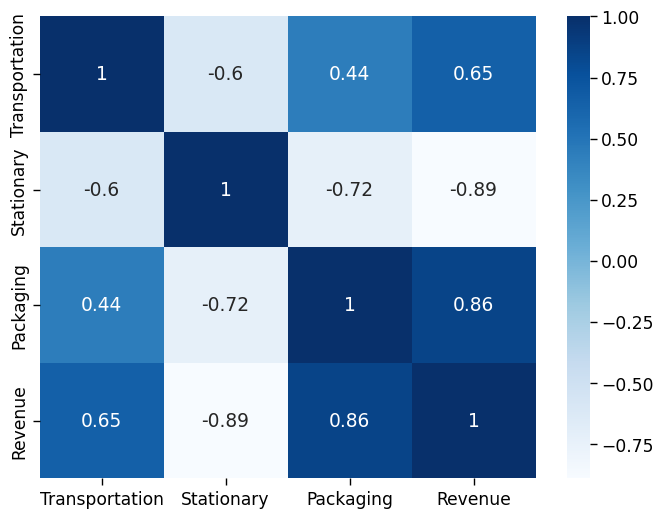

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='Blues')

In [ ]:
corr_matrix

,Transportation,Stationary,Packaging,Revenue
Transportation,1.000000,-0.603492,0.439246,0.650058
Stationary,-0.603492,1.000000,-0.722940,-0.890634
Packaging,0.439246,-0.722940,1.000000,0.858355
Revenue,0.650058,-0.890634,0.858355,1.000000


<Axes: xlabel='Transportation', ylabel='Density'>

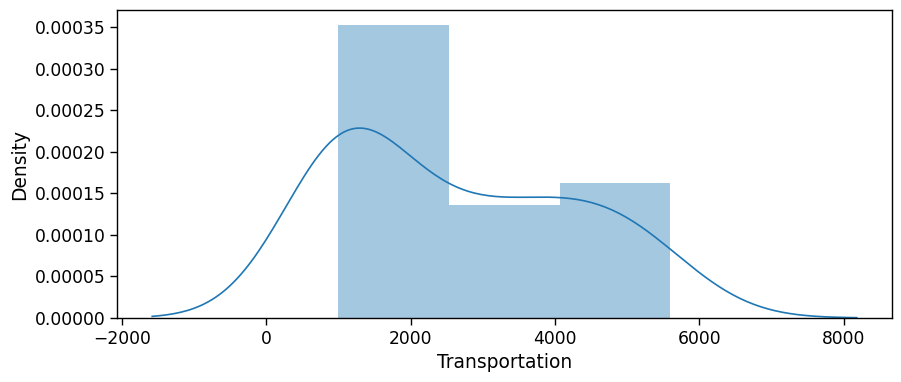

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df['Transportation'])

<Axes: xlabel='Stationary', ylabel='Density'>

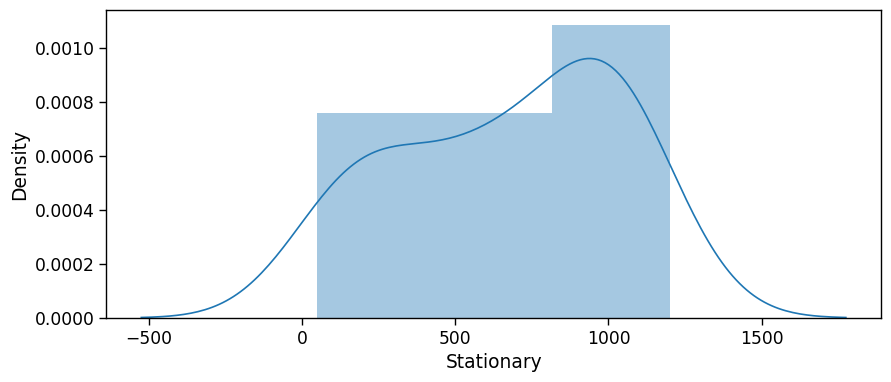

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df['Stationary'])

<Axes: xlabel='Packaging', ylabel='Density'>

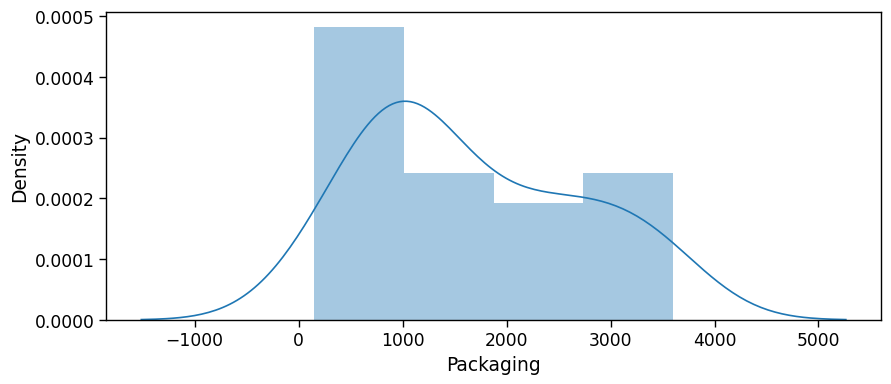

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df['Packaging'])

<Axes: xlabel='Revenue', ylabel='Density'>

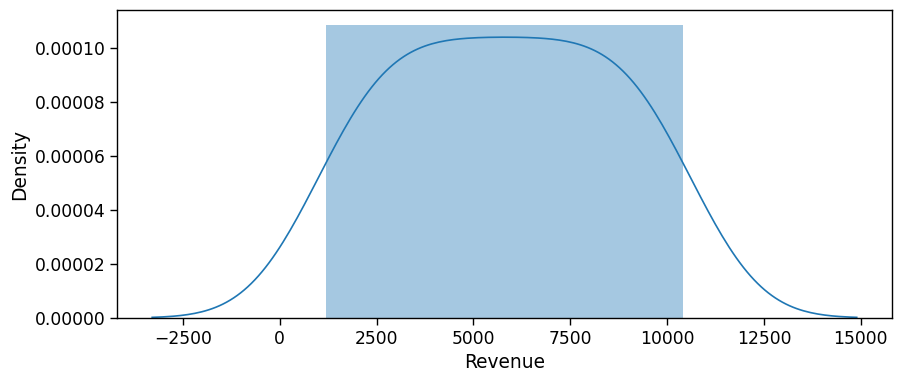

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df['Revenue'])

In [ ]:
X=df[['Transportation','Stationary','Packaging']]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data

,feature
0,Transportation
1,Stationary
2,Packaging


In [ ]:
vif_data["VIF"]=[variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]

In [ ]:
print(vif_data)

          feature       VIF
0  Transportation  3.865055
1      Stationary  1.632915
2       Packaging  3.636622


In [ ]:
def model_summary(x,y):
  xtr=sm.add_constant(np.array(df[x]))
  model=sm.OLS(np.array(df[y]),xtr).fit()
  print(model.summary())

In [ ]:
model_summary('Transportation','Revenue')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     16.10
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           0.000585
Time:                        14:13:54   Log-Likelihood:                -217.69
No. Observations:                  24   AIC:                             439.4
Df Residuals:                      22   BIC:                             441.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2831.1876    865.891      3.270      0.0

In [ ]:
model_summary('Stationary','Revenue')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     84.40
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           5.52e-09
Time:                        14:14:31   Log-Likelihood:                -205.37
No. Observations:                  24   AIC:                             414.7
Df Residuals:                      22   BIC:                             417.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.05e+04    577.781     18.179      0.0

In [ ]:
model_summary('Packaging','Revenue')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     61.58
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.12e-08
Time:                        14:14:52   Log-Likelihood:                -208.27
No. Observations:                  24   AIC:                             420.5
Df Residuals:                      22   BIC:                             422.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1928.4054    579.246      3.329      0.0

In [ ]:
model_summary(['Stationary','Packaging'],'Revenue')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     84.61
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.94e-11
Time:                        14:15:45   Log-Likelihood:                -197.84
No. Observations:                  24   AIC:                             401.7
Df Residuals:                      21   BIC:                             405.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6760.9120    975.095      6.934      0.0

In [ ]:
df.drop(columns=['Transportation'], inplace=True)

In [ ]:
#Modeling
X=df[['Stationary','Packaging']]
y=df['Revenue']

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[4946.14 4403.  ]
 [5995.76 7603.  ]
 [1766.29 1203.  ]
 [8920.94 8403.  ]
 [6138.58 5603.  ]
 [4656.45 4803.  ]
 [6933.54 6403.  ]
 [2163.77 1603.  ]]


In [ ]:
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 625.6317564183444
MSE 546005.4445804381
RMSE 738.9218122240255


In [ ]:
print(r2_score(y_test,y_pred))

0.907141931193803
